DOWNLOADING NECESSARY LIBRARIES

In [ ]:
!pip install numpy
!pip install pandas
!pip install yfinance

DOWNLOADING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yfinance as yf

DEFINING BASIC VARIABLES

Selecting 5 high performance stocks from various sectors to reduce the correlaiton between them and a time period of 5 years to analyse the data

In [ ]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ['HDFCBANK.NS','RELIANCE.NS','FORTIS.NS','AMBUJACEM.NS','ITC.NS']

start_date = '2018-10-17'
end_date = '2023-10-17'

FETCHING STOCK DATA AND CREATING A DATAFRAME OUT OF THIS DATA

We chose closing price for genrality

In [ ]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

# stock_prices.dropna(inplace = True)
stock_prices

,HDFCBANK.NS,RELIANCE.NS,FORTIS.NS,AMBUJACEM.NS,ITC.NS
Date,,,,,
2018-10-17 00:00:00+05:30,952.674622,1119.008179,132.545959,192.924423,237.405716
2018-10-19 00:00:00+05:30,949.369812,1070.410767,130.900970,184.039169,239.892075
2018-10-22 00:00:00+05:30,964.398560,1032.844849,130.851120,181.224030,239.104706
2018-10-23 00:00:00+05:30,957.619995,1025.117676,127.012825,176.473526,237.032761
2018-10-24 00:00:00+05:30,961.190186,1016.418701,132.545959,172.778625,238.483093
...,...,...,...,...,...
2023-10-10 00:00:00+05:30,1524.849976,2308.399902,333.399994,437.200012,444.399994
2023-10-11 00:00:00+05:30,1539.599976,2345.050049,333.899994,445.100006,448.250000
2023-10-12 00:00:00+05:30,1549.849976,2349.399902,336.250000,445.600006,450.700012


CALCULATING DAILY LOG RETURNS OF EACH STOCK

In [ ]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns.dropna(inplace = True)                                # First row will have Nan value
log_returns

,HDFCBANK.NS,RELIANCE.NS,FORTIS.NS,AMBUJACEM.NS,ITC.NS
Date,,,,,
2018-10-19 00:00:00+05:30,-0.003475,-0.044400,-0.012488,-0.047150,0.010419
2018-10-22 00:00:00+05:30,0.015706,-0.035725,-0.000381,-0.015415,-0.003288
2018-10-23 00:00:00+05:30,-0.007054,-0.007510,-0.029772,-0.026563,-0.008703
2018-10-24 00:00:00+05:30,0.003721,-0.008522,0.042641,-0.021160,0.006100
2018-10-25 00:00:00+05:30,-0.011840,-0.014399,-0.023593,-0.019797,-0.000695
...,...,...,...,...,...
2023-10-10 00:00:00+05:30,0.005656,0.004407,0.008585,0.016141,0.008928
2023-10-11 00:00:00+05:30,0.009627,0.015752,0.001499,0.017908,0.008626
2023-10-12 00:00:00+05:30,0.006636,0.001853,0.007013,0.001123,0.005451


CALCULATING ANNUAL RETURNS BY AVERAGING DAILY RETURNS AND SUMMING FOR ONE YEAR

In [ ]:
yearly_returns = log_returns.mean()*NUM_TRADING_DAYS
yearly_returns

HDFCBANK.NS     0.096693
RELIANCE.NS     0.151003
FORTIS.NS       0.190684
AMBUJACEM.NS    0.169872
ITC.NS          0.130113
dtype: float64

PLOTTING CORRELATION MATRIX TO REALISE THE RELATION BETWEEN STOCKS IS MINIMAL

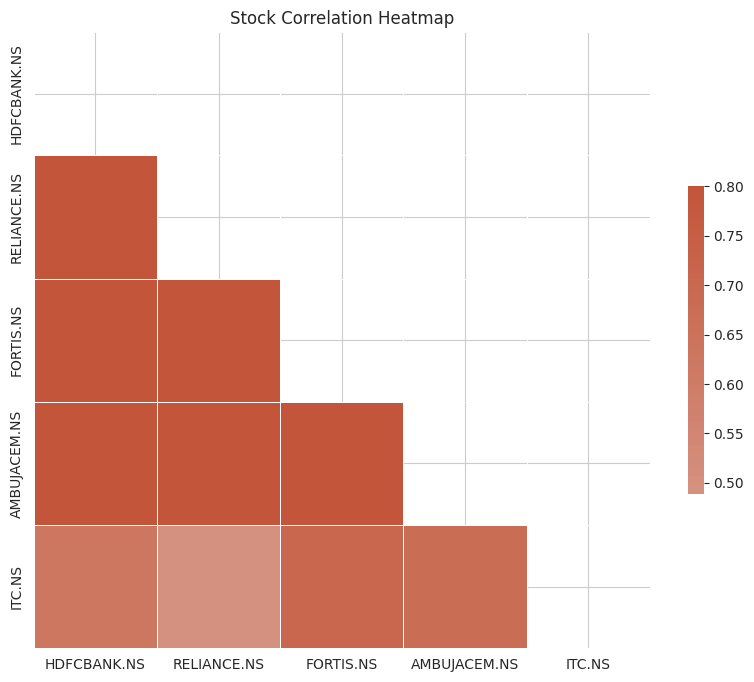

In [ ]:
correlation_matrix = stock_prices.corr()



# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title('Stock Correlation Heatmap')

# Show the plot
plt.show()

Explanation of the code below:

w = np.random.random(len(stocks)) - In this line, a random array of numbers is generated using the NumPy library. The length of this array is the same as the number of stocks in your portfolio. These random numbers represent the weights assigned to each stock in the portfolio.

w /= np.sum(w) - Here, the random weights are normalized. This means that the sum of all the weights in the portfolio will add up to 1. This ensures that the portfolio's assets are allocated properly, so you're not overinvesting in any single stock.

portfolio_weights.append(w) - The weights of the stocks in the current portfolio are stored in a list for later analysis.

port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by log_returns.mean()) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

portfolio_returns.append(port_return) - The estimated return for the current portfolio is stored in a list for later analysis.

port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w))) - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in port_risk.

portfolio_risks.append(port_risk) - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [ ]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for _ in range(NUM_SIMULATIONS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7%

In [ ]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the diffrent portfolios]

In [ ]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": (portfolio_returns-risk_free_rate)/portfolio_risks})

portfolios

,Return,Risk,Sharpe
0,0.154617,0.212298,0.398577
1,0.150454,0.201457,0.399358
2,0.129410,0.196491,0.302355
3,0.151932,0.205606,0.398492
4,0.141803,0.208961,0.343619
...,...,...,...
99995,0.142479,0.201106,0.360403
99996,0.152902,0.218097,0.380116
99997,0.154272,0.201490,0.418245
99998,0.145663,0.216139,0.350067


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS
# *Plotting it*

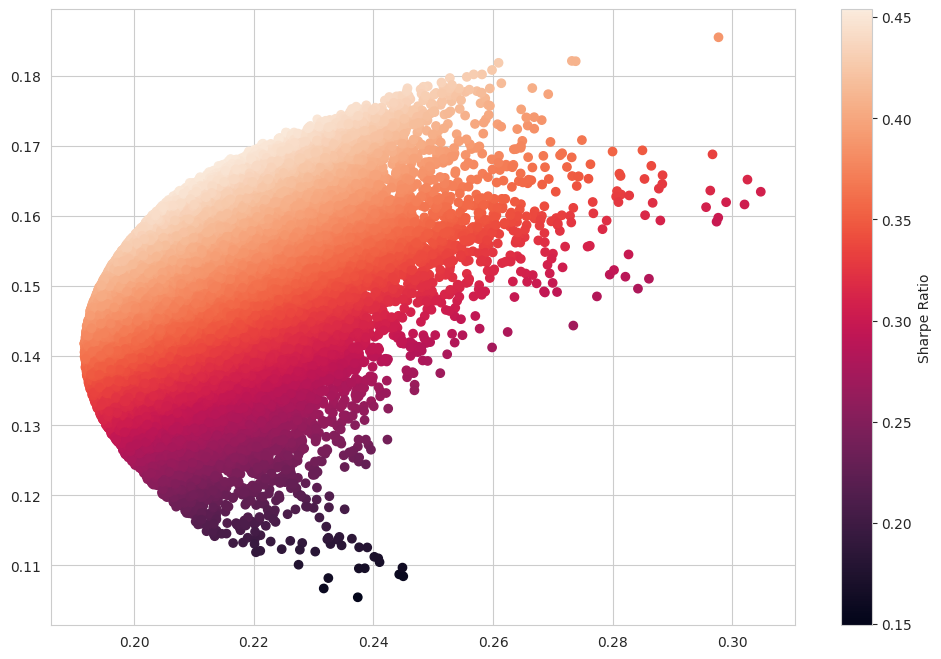

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"

First let's find out the Portfolio with the maximum Sharpe Ratio

In [ ]:
sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

PRINTING VALUES

In [ ]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  0.453908941897386
Corresponding Return =   0.16809189967396726
Corresponding Risk =   0.21610479684302547


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [ ]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

HDFCBANK.NS : 0.0018554699702691326
RELIANCE.NS : 0.20931633614052952
FORTIS.NS : 0.4211703894026756
AMBUJACEM.NS : 0.2051700033962876
ITC.NS : 0.16248780109023814


Plotting the point of our portfolio with max sharpe

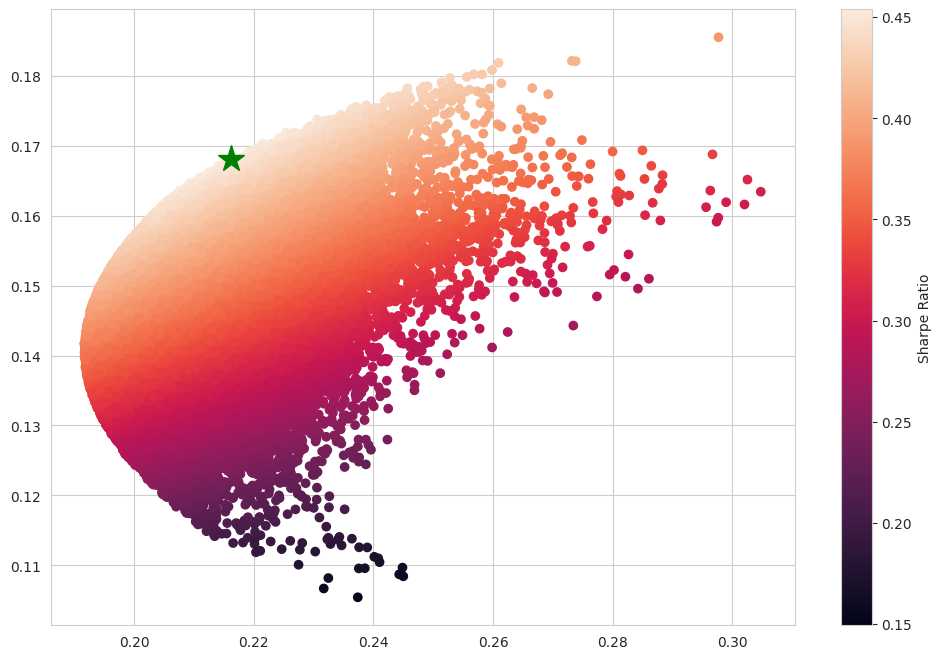

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [ ]:
ind = 0
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i]==np.amin(portfolio_risks)):
        ind = i
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])


Minimum Risk =  0.19165034392787705
Corresponding Return =   0.1417468772484095


In [ ]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

HDFCBANK.NS : 0.23141635959952456
RELIANCE.NS : 0.13179266910718077
FORTIS.NS : 0.2158564133443166
AMBUJACEM.NS : 0.08903434003279481
ITC.NS : 0.33190021791618324


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

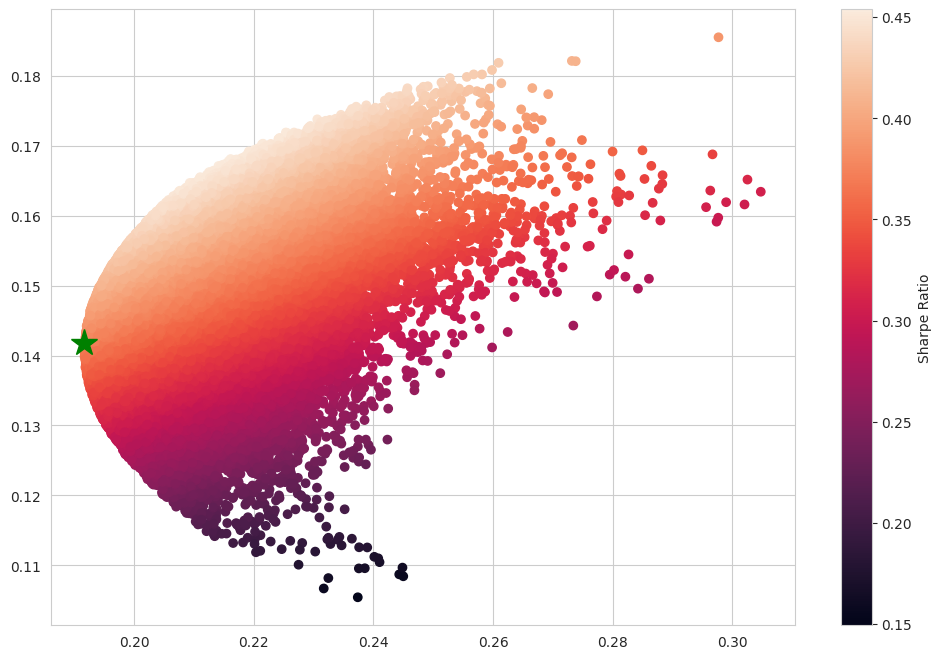

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk